<a href="https://colab.research.google.com/github/ychennay/dso-560-nlp-text-analytics-SPRING-2021/blob/main/Week%208/Using_RNNs_and_LSTMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving good_amazon_toy_reviews.txt to good_amazon_toy_reviews.txt
Saving poor_amazon_toy_reviews.txt to poor_amazon_toy_reviews.txt


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Using-RNNs-and-LSTMs-in-Keras-for-NLP-Classification-Tasks" data-toc-modified-id="Using-RNNs-and-LSTMs-in-Keras-for-NLP-Classification-Tasks-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Using RNNs and LSTMs in Keras for NLP Classification Tasks</a></span><ul class="toc-item"><li><span><a href="#Problem-Statement:-Predict-Sentiment-of-Amazon-Reviews" data-toc-modified-id="Problem-Statement:-Predict-Sentiment-of-Amazon-Reviews-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Problem Statement: Predict Sentiment of Amazon Reviews</a></span></li><li><span><a href="#Tokenize-Text" data-toc-modified-id="Tokenize-Text-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Tokenize Text</a></span></li><li><span><a href="#Import-Keras-Toolkit" data-toc-modified-id="Import-Keras-Toolkit-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Import Keras Toolkit</a></span></li><li><span><a href="#Load-in-GloVe-Vectors" data-toc-modified-id="Load-in-GloVe-Vectors-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Load in GloVe Vectors</a></span></li><li><span><a href="#Load-in-Embeddings" data-toc-modified-id="Load-in-Embeddings-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Load in Embeddings</a></span></li><li><span><a href="#Define-in-Model" data-toc-modified-id="Define-in-Model-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Define in Model</a></span></li><li><span><a href="#Compile-Model" data-toc-modified-id="Compile-Model-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Compile Model</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Helpful-Rule-of-Thumb-for-Defining-#-of-Parameters-in-LSTM:" data-toc-modified-id="Helpful-Rule-of-Thumb-for-Defining-#-of-Parameters-in-LSTM:-1.7.0.1"><span class="toc-item-num">1.7.0.1&nbsp;&nbsp;</span>Helpful Rule of Thumb for Defining # of Parameters in LSTM:</a></span></li></ul></li></ul></li><li><span><a href="#Fit-the-Model" data-toc-modified-id="Fit-the-Model-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Fit the Model</a></span></li><li><span><a href="#Evaluate-the-Model" data-toc-modified-id="Evaluate-the-Model-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Evaluate the Model</a></span></li><li><span><a href="#Try-Some-Random-Reviews" data-toc-modified-id="Try-Some-Random-Reviews-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Try Some Random Reviews</a></span></li></ul></li><li><span><a href="#Problem-Statement:-Predict-City-of-McDonalds-Review" data-toc-modified-id="Problem-Statement:-Predict-City-of-McDonalds-Review-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Problem Statement: Predict City of McDonalds Review</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Load-in-McDonalds-Yelp-Reviews" data-toc-modified-id="Load-in-McDonalds-Yelp-Reviews-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Load in McDonalds Yelp Reviews</a></span></li></ul></li><li><span><a href="#Get-Your-Feature-Space-and-Target-Labels" data-toc-modified-id="Get-Your-Feature-Space-and-Target-Labels-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Get Your Feature Space and Target Labels</a></span></li><li><span><a href="#Perform-Label-Categorical-Encoding-of-Cities" data-toc-modified-id="Perform-Label-Categorical-Encoding-of-Cities-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Perform Label Categorical Encoding of Cities</a></span></li><li><span><a href="#Remove-Stopwords-Using-SpaCy" data-toc-modified-id="Remove-Stopwords-Using-SpaCy-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Remove Stopwords Using SpaCy</a></span></li><li><span><a href="#Tokenize-the-Text" data-toc-modified-id="Tokenize-the-Text-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Tokenize the Text</a></span></li><li><span><a href="#Integer-Encode-Tokens" data-toc-modified-id="Integer-Encode-Tokens-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Integer Encode Tokens</a></span></li><li><span><a href="#Get-Max-Length-Per-Token" data-toc-modified-id="Get-Max-Length-Per-Token-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Get Max Length Per Token</a></span></li><li><span><a href="#Split-into-Train/Test-Split" data-toc-modified-id="Split-into-Train/Test-Split-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Split into Train/Test Split</a></span></li><li><span><a href="#Keras-RNN-Architecture" data-toc-modified-id="Keras-RNN-Architecture-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Keras RNN Architecture</a></span></li><li><span><a href="#Load-in-Glove-Vectors" data-toc-modified-id="Load-in-Glove-Vectors-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Load in Glove Vectors</a></span></li><li><span><a href="#Load-in-the-Embeddings" data-toc-modified-id="Load-in-the-Embeddings-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>Load in the Embeddings</a></span></li><li><span><a href="#Define-Model" data-toc-modified-id="Define-Model-2.11"><span class="toc-item-num">2.11&nbsp;&nbsp;</span>Define Model</a></span></li><li><span><a href="#Compile-the-Model" data-toc-modified-id="Compile-the-Model-2.12"><span class="toc-item-num">2.12&nbsp;&nbsp;</span>Compile the Model</a></span></li><li><span><a href="#Fit-the-Model" data-toc-modified-id="Fit-the-Model-2.13"><span class="toc-item-num">2.13&nbsp;&nbsp;</span>Fit the Model</a></span></li><li><span><a href="#Evaluate-the-Model" data-toc-modified-id="Evaluate-the-Model-2.14"><span class="toc-item-num">2.14&nbsp;&nbsp;</span>Evaluate the Model</a></span></li></ul></li></ul></div>

# Using RNNs and LSTMs in Keras for NLP Classification Tasks

## Problem Statement: Predict Sentiment of Amazon Reviews

In [73]:
import numpy as np
NUM_SAMPLES = 8000 # note that we are only using 5000 samples from each class

good_reviews = open("good_amazon_toy_reviews.txt").readlines()
bad_reviews = open("poor_amazon_toy_reviews.txt").readlines()

sampled_good_reviews = good_reviews[:NUM_SAMPLES]
sampled_bad_reviews = bad_reviews[:NUM_SAMPLES]

docs = sampled_good_reviews + sampled_bad_reviews
labels = np.concatenate([np.ones(NUM_SAMPLES), np.zeros(NUM_SAMPLES)])


In [74]:
print(f"There are {len(docs)} documents to classify.")
print(f"Examples of labels: {labels[:5]}")

There are 16000 documents to classify.
Examples of labels: [1. 1. 1. 1. 1.]


#md Download the `en_core_web_md` language model

In [75]:
!python -m spacy download en_core_web_md

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [76]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize 
from typing import List

# remove all the stopwords from these documents
stop_words = set(stopwords.words('english')) 
  
stopwords_removed_docs = []
for doc in docs:
  word_tokens = word_tokenize(doc) 
  filtered_sentence = [w for w in word_tokens if not w in stop_words] 
  stopwords_removed_docs.append(" ".join(filtered_sentence))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Tokenize Text

In [77]:
from keras.preprocessing.text import Tokenizer
# so this means that all tokens that are not found in the vocabulary are going to be marked as UNKNOWN_TOKEN
tokenizer = Tokenizer(num_words=5000, oov_token="UNKNOWN_TOKEN")
tokenizer.fit_on_texts(stopwords_removed_docs)

In [78]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
def integer_encode_documents(docs, tokenizer):
    return tokenizer.texts_to_sequences(docs)

# integer encode the documents
encoded_docs = integer_encode_documents(stopwords_removed_docs, tokenizer)
# see some lengths of the documents
list(map(len, encoded_docs))[:5]

[1, 28, 14, 13, 3]

In [79]:
# set MAX_SEQUENCE_LENGTH to 64
MAX_SEQUENCE_LENGTH = 64

In [80]:
# this is a list of lists, the numbers represent the index position of that word.
# for instance, 33 means the 33rd word in the vocabulary
# Notice the last document has 4 numbers, since it is a 4 word document: Could have done better.
padded_docs = pad_sequences(encoded_docs, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

In [81]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
labels = to_categorical(encoder.fit_transform(labels))

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded_docs, labels, test_size=0.2)

## Import Keras Toolkit

In [83]:
from random import randint
from numpy import array, argmax, asarray, zeros
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding

In [84]:
VOCAB_SIZE = int(len(tokenizer.word_index) * 1.1)

## Load in GloVe Vectors

In [27]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2021-05-04 23:29:47--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-05-04 23:29:48--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-05-04 23:29:48--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [28]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [85]:
def load_glove_vectors():
    embeddings_index = {}
    with open('glove.6B.100d.txt') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    print('Loaded %s word vectors.' % len(embeddings_index))
    return embeddings_index


embeddings_index = load_glove_vectors()

Loaded 400000 word vectors.


## Load in Embeddings

In [86]:
# create a weight matrix for words in training docs
embedding_matrix = zeros((VOCAB_SIZE, 100))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: # check that it is an actual word that we have embeddings for
        embedding_matrix[i] = embedding_vector

## Define in Model

In [87]:
import keras
from keras.layers.recurrent import SimpleRNN, LSTM
from keras.layers import Flatten, Masking
# define model

def make_binary_classification_rnn_model(plot=False):
    model =  keras.models.Sequential()
    model.add(Embedding(VOCAB_SIZE, 100, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH, trainable=False))
    model.add(Masking(mask_value=0.0)) # masking layer, masks any words that don't have an embedding as 0s.
    model.add(SimpleRNN(units=64, input_shape=(1, MAX_SEQUENCE_LENGTH)))
    model.add(Dense(16))
    model.add(Dense(2, activation='softmax'))
    
    # Compile the model
    model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    # summarize the model
    model.summary()
    
    if plot:
        plot_model(model, to_file='model.png', show_shapes=True)
    return model

def make_lstm_classification_model(plot=False):
    model =  keras.models.Sequential()
    model.add(Embedding(VOCAB_SIZE, 100, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH, trainable=False))
    model.add(Masking(mask_value=0.0)) # masking layer, masks any words that don't have an embedding as 0s.
    model.add(LSTM(units=32, input_shape=(1, MAX_SEQUENCE_LENGTH)))
    model.add(Dense(16))
    model.add(Dense(2, activation='softmax'))
    
    # Compile the model
    model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    # summarize the model
    model.summary()
    
    if plot:
        plot_model(model, to_file='model.png', show_shapes=True)
    return model

## Compile Model

#### Helpful Rule of Thumb for Defining # of Parameters in LSTM:

$$
W = 4d×(n+d)
$$
Where $d$ is the number of memory cells, and $N$ is the number of dimensions for a data point.

In [88]:
model = make_binary_classification_rnn_model()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 64, 100)           1776500   
_________________________________________________________________
masking_1 (Masking)          (None, 64, 100)           0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 64)                10560     
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 34        
Total params: 1,788,134
Trainable params: 11,634
Non-trainable params: 1,776,500
_________________________________________________________________


## Fit the Model

In [89]:
# fit the model
history = model.fit(X_train, y_train,validation_split = 0.1, epochs=20, verbose=1)

Epoch 1/20
360/360 [==============================] - 16s 40ms/step - loss: 0.5156 - accuracy: 0.7428 - val_loss: 0.3005 - val_accuracy: 0.8758
Epoch 2/20
360/360 [==============================] - 14s 39ms/step - loss: 0.3383 - accuracy: 0.8620 - val_loss: 0.3136 - val_accuracy: 0.8781
Epoch 3/20
360/360 [==============================] - 14s 39ms/step - loss: 0.2958 - accuracy: 0.8856 - val_loss: 0.2831 - val_accuracy: 0.8883
Epoch 4/20
360/360 [==============================] - 14s 39ms/step - loss: 0.2738 - accuracy: 0.8937 - val_loss: 0.2837 - val_accuracy: 0.8836
Epoch 5/20
360/360 [==============================] - 14s 39ms/step - loss: 0.2721 - accuracy: 0.8926 - val_loss: 0.2738 - val_accuracy: 0.8984
Epoch 6/20
360/360 [==============================] - 14s 39ms/step - loss: 0.2800 - accuracy: 0.8889 - val_loss: 0.2681 - val_accuracy: 0.8875
Epoch 7/20
360/360 [==============================] - 14s 39ms/step - loss: 0.2440 - accuracy: 0.9106 - val_loss: 0.2961 - val_accuracy:

KeyboardInterrupt: ignored

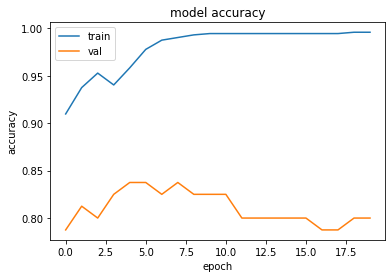

In [37]:
import keras
from matplotlib import pyplot as plt

def plot_fit_history(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
plot_fit_history(history)

## Evaluate the Model

In [38]:
# evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print('Accuracy: %f' % (accuracy*100))

7/7 [==============================] - 0s 11ms/step - loss: 0.7187 - accuracy: 0.8250
Accuracy: 82.499999


## Try Some Random Reviews

In [50]:
test_docs = [
    "Amazing, my son loved it as soon as he opened it.",
    "Piece of crap junk broke as soon as it was opened.",
    "Solid toy, it was easy to set up and still works even years later",
    "This toy is not good"

]

test_docs = list(
    map(lambda doc: " ".join([token.text for token in nlp(doc) if not token.is_stop]), test_docs))

encoded_test_sample = integer_encode_documents(test_docs, tokenizer)

padded_test_docs = pad_sequences(encoded_test_sample, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

prediction = model.predict_classes(padded_test_docs)
encoder.inverse_transform(prediction)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([1., 0., 1., 0.])

# Problem Statement: Predict City of McDonalds Review

We want to try predict the city that a review corresponds to. For example, given that a McDonalds Yelp review:
```
"First they ""lost"" my order, actually they gave it to someone one else than took 20 minutes to figure out why I was still waiting for my order.They after I was asked what I needed I replied, ""my order"".They asked for my ticket and the asst mgr looked at the ticket then incompletely filled it.I had to ask her to check to see if she filled it correctly.She acted as if she couldn't be bothered with that so I asked her again.She begrudgingly checked to she did in fact miss something on the ticket.So after 22 minutes I finally had my breakfast biscuit platter.As I left an woman approached and identified herself as the manager, she was dressed as if she had just awoken in an old t-shirt and sweat pants.She said she had heard what happened and said she'd take care of it.Well why didn't she intervene when she saw I was growing annoyed with the incompetence?"
```

We want to be able to correctly predict that is is from `Atlanta`.

### Load in McDonalds Yelp Reviews

In [46]:
from google.colab import files
uploaded = files.upload()

Saving mcdonalds-yelp-negative-reviews.csv to mcdonalds-yelp-negative-reviews.csv


In [90]:
import pandas as pd
reviews_df: pd.DataFrame = pd.read_csv(
    "mcdonalds-yelp-negative-reviews.csv", encoding="latin1")
reviews_df = reviews_df[~reviews_df["city"].isnull()] # filter out null cities

reviews_df.sample(len(reviews_df)).head() # shuffle the rows

,_unit_id,city,review
335,679455994,Las Vegas,"I'LL HAVE ONE BREAKFAST MCMUFFIN, HOLD THE GUN..."
147,679455801,Las Vegas,Worst McDonalds in Vegas! Bad service consiste...
954,679456625,Cleveland,"Wow... absolutely the worst, most shameful McD..."
302,679455960,Las Vegas,Went here after work for a quick Mickey D fix....
450,679456109,Las Vegas,This has gotta be the cheapest McDonalds in Mc...


## Get Your Feature Space and Target Labels

In [91]:
labels = reviews_df["city"]
docs = reviews_df["review"]
labels

0           Atlanta
1           Atlanta
2           Atlanta
3           Atlanta
4           Atlanta
           ...     
1520       Portland
1521        Houston
1522       New York
1523        Chicago
1524    Los Angeles
Name: city, Length: 1438, dtype: object

## Perform Label Categorical Encoding of Cities

In [92]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
labels = to_categorical(encoder.fit_transform(labels))

## Remove Stopwords Using SpaCy

In [93]:
# import spacy
# nlp = spacy.load('en_core_web_sm')
# stopwords_removed_docs = list(
#     map(lambda doc: " ".join([token.text for token in nlp(doc) if not token.is_stop]), docs))

stopwords_removed_docs = []
for doc in docs:
  word_tokens = word_tokenize(doc) 
  filtered_sentence = [w for w in word_tokens if not w in stop_words] 
  stopwords_removed_docs.append(" ".join(filtered_sentence))

## Tokenize the Text

In [94]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token="UNKNOWN_TOKEN")
tokenizer.fit_on_texts(stopwords_removed_docs)

## Integer Encode Tokens

In [95]:
def integer_encode_documents(docs, tokenizer):
    return tokenizer.texts_to_sequences(docs)

## Get Max Length Per Token

In [96]:
from typing import List
def get_max_token_length_per_doc(docs: List[List[str]])-> int:
    return max(list(map(lambda x: len(x.split()), docs)))

# get the max length in terms of token length
max_length = get_max_token_length_per_doc(docs)

In [97]:
from keras.preprocessing.sequence import pad_sequences
MAX_SEQUENCE_LENGTH = 300
# integer encode the documents
encoded_docs = integer_encode_documents(stopwords_removed_docs, tokenizer)
# this is a list of lists, the numbers represent the index position of that word.
# for instance, 33 means the 33rd word in the vocabulary
padded_docs = pad_sequences(encoded_docs, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

## Split into Train/Test Split

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded_docs, labels, test_size=0.1)

## Keras RNN Architecture

In [99]:
VOCAB_SIZE = int(len(tokenizer.word_index) * 1.1)

## Load in Glove Vectors

In [100]:
def load_glove_vectors():
    embeddings_index = {}
    with open('glove.6B.100d.txt') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    print('Loaded %s word vectors.' % len(embeddings_index))
    return embeddings_index


embeddings_index = load_glove_vectors()

Loaded 400000 word vectors.


## Load in the Embeddings

In [102]:
tokenizer.word_index

{'UNKNOWN_TOKEN': 1,
 'i': 2,
 "'s": 3,
 "n't": 4,
 'food': 5,
 'the': 6,
 'mcdonald': 7,
 'order': 8,
 'one': 9,
 'get': 10,
 'drive': 11,
 'mcdonalds': 12,
 'go': 13,
 'service': 14,
 'time': 15,
 'it': 16,
 'like': 17,
 'place': 18,
 'this': 19,
 'thru': 20,
 "''": 21,
 'location': 22,
 'would': 23,
 'they': 24,
 'people': 25,
 'back': 26,
 "'m": 27,
 'got': 28,
 "'ve": 29,
 'even': 30,
 'always': 31,
 'fries': 32,
 'never': 33,
 'good': 34,
 'ever': 35,
 'ordered': 36,
 'minutes': 37,
 'coffee': 38,
 'window': 39,
 'went': 40,
 'right': 41,
 'really': 42,
 '2': 43,
 'fast': 44,
 'line': 45,
 'could': 46,
 'worst': 47,
 'staff': 48,
 'times': 49,
 'know': 50,
 'said': 51,
 'manager': 52,
 '1': 53,
 'and': 54,
 'way': 55,
 'customer': 56,
 'give': 57,
 'work': 58,
 'bad': 59,
 'two': 60,
 'breakfast': 61,
 'around': 62,
 'want': 63,
 'wrong': 64,
 'asked': 65,
 'inside': 66,
 'first': 67,
 'say': 68,
 'eat': 69,
 'wait': 70,
 'there': 71,
 'so': 72,
 'we': 73,
 'not': 74,
 'also': 75

In [109]:
# create a weight matrix for words in training docs
embedding_matrix = zeros((VOCAB_SIZE, 100))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: # check that it is an actual word that we have embeddings for
        embedding_matrix[i] = embedding_vector

## Define Model

In [ ]:
MAX_SEQUENCE_LENGTH

300

In [103]:
padded_docs

array([[   2,   27,  702, ...,    0,    0,    0],
       [ 235,   56,   14, ...,    0,    0,    0],
       [  67,  762,   21, ...,    0,    0,    0],
       ...,
       [ 102,    2,   42, ...,    0,    0,    0],
       [  60, 1404,   41, ...,    0,    0,    0],
       [   2,  189,  324, ...,    0,    0,    0]], dtype=int32)

(17765, 100)

In [118]:
from keras.layers.recurrent import SimpleRNN
from keras.layers import Flatten, Masking
# define model
model = Sequential()
model.add(Embedding(embedding_matrix.shape[0], 
                    100, 
                    weights=[embedding_matrix], 
                    input_length=MAX_SEQUENCE_LENGTH, trainable=False))
model.add(Masking(mask_value=0.0)) # masking layer, masks any words that don't have an embedding as 0s.
model.add(SimpleRNN(units=64, input_shape=(1, MAX_SEQUENCE_LENGTH)))
model.add(Dense(64))
model.add(Dense(9, activation='softmax'))

## Compile the Model

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 300, 100)          900100    
_________________________________________________________________
masking_3 (Masking)          (None, 300, 100)          0         
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 64)                10560     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 9)                 585       
Total params: 915,405
Trainable params: 15,305
Non-trainable params: 900,100
_________________________________________________________________
None


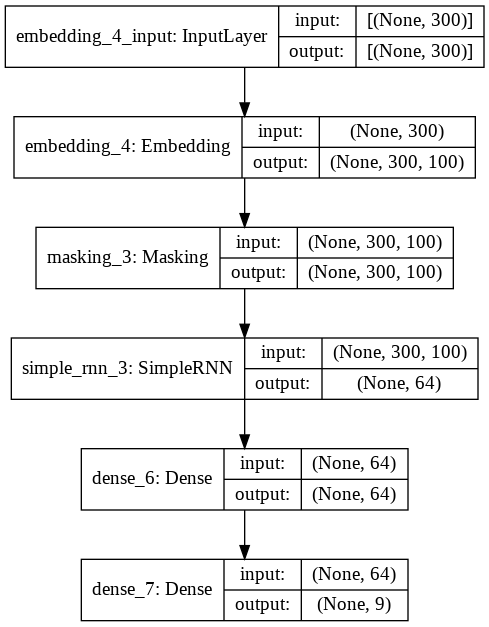

In [119]:
from keras.utils.vis_utils import plot_model

# Compile the model
model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# summarize the model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True)

## Fit the Model

Before we start training, let's take a look at the relative distribution of counts for cities. Baseline performance accuracy for this model should be the largest value **~28.4%**. You can get this accuracy by predicting the model.

In [120]:
reviews_df["city"].value_counts(normalize=True)

Las Vegas      0.284423
Chicago        0.152295
Los Angeles    0.116134
New York       0.114743
Atlanta        0.090403
Houston        0.073018
Portland       0.067455
Dallas         0.052156
Cleveland      0.049374
Name: city, dtype: float64

In [121]:
# fit the model
model.fit(X_train, y_train, epochs=3, verbose=1)

Epoch 1/3
41/41 [==============================] - 18s 400ms/step - loss: 2.2225 - accuracy: 0.2066
Epoch 2/3
41/41 [==============================] - 16s 397ms/step - loss: 1.9991 - accuracy: 0.2736
Epoch 3/3
41/41 [==============================] - 16s 398ms/step - loss: 1.9376 - accuracy: 0.3161


## Evaluate the Model

In [122]:
# evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print('Accuracy: %f' % (accuracy*100))

5/5 [==============================] - 0s 39ms/step - loss: 2.1444 - accuracy: 0.2361
Accuracy: 23.611110


In [123]:
test_docs = [
    "Employees look like they hate their job. Milkshake was like drinking milk. Food was cold and not warm at all",
    "This Mcdonalds is not only in the business of making crappy food and providing even crappier service watch out for the racket they have in the parking lot . If your not careful reading the sign at the the front of the entrance it is going to cost you $195.00 in parking fees. went in to to ask the management they just blew me off. lucky they are in vegas where they dont count on repeat businesssss.",
    "There are better stores without fruit flies in Griffin, GA.",
    "Slowest drive-thru ever. Better option is to go to the location on arlington"
]

test_docs = list(
    map(lambda doc: " ".join([token.text for token in nlp(doc) if not token.is_stop]), test_docs))

encoded_test_sample = integer_encode_documents(test_docs, tokenizer)

padded_test_docs = pad_sequences(encoded_test_sample, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

In [124]:
model.predict_classes(padded_test_docs)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([5, 6, 7, 5])

In [125]:
prediction = model.predict_classes(padded_test_docs)
encoder.inverse_transform(prediction)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array(['Las Vegas', 'Los Angeles', 'New York', 'Las Vegas'], dtype=object)